In [72]:
from scipy.odr import RealData, ODR, quadratic

In [138]:
data = RealData(x=[30, 40, 50, 45], y=[34.1, 36.3, 35, 36.5], sy=1/np.power([0.01, 0.01, 0.01, 0.01], 2))

In [139]:
odr = ODR(data, quadratic)

In [140]:
odr.run()

In [141]:
odr.output.pprint()

Beta: [-0.01900003  1.57100245  4.03995244]
Beta Std Error: [  3.54969160e-03   2.82242399e-01   5.44866696e+00]
Beta Covariance: [[  1.27275863e+04  -1.00911464e+06   1.92731569e+07]
 [ -1.00911464e+06   8.04654259e+07  -1.54694133e+09]
 [  1.92731569e+07  -1.54694133e+09   2.99878502e+10]]
Residual Variance: 9.899999998513148e-10
Inverse Condition #: 1.4883706683789482e-05
Reason(s) for Halting:
  Sum of squares convergence


In [142]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

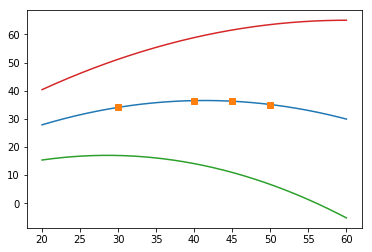

In [143]:
x = np.arange(20, 60, 0.01)
plt.plot(x, quadratic.fcn(odr.output.beta, x))
plt.plot(data.x, data.y, 's')
plt.plot(x, quadratic.fcn(odr.output.beta - odr.output.sd_beta, x))
plt.plot(x, quadratic.fcn(odr.output.beta + odr.output.sd_beta, x))

In [112]:
maxloc = -odr.output.beta[1] / (2 * odr.output.beta[0]); maxloc

41.468052317473173

In [113]:
maxunc = np.sqrt((odr.output.beta[1] / (2 * odr.output.beta[0]**2))**2 * odr.output.sd_beta[0]**2 +
                 (1 / (2 * odr.output.beta[0]))**2 * odr.output.sd_beta[1]**2); maxunc

11.341057198633868

In [103]:
odr.output.beta

array([-0.0229539 ,  1.88150753, -1.68859319])

In [104]:
odr.output.sd_beta

array([  6.83242252e-04,   5.47301836e-02,   1.07173762e+00])